In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/asreddyIITB/ml/main/hyperParameter/data/data.csv')

In [80]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [81]:
# all of the values in Unnamed column are null. So lets drop it.
df=df.drop('Unnamed: 32',axis=1)

In [82]:
df_stats = df.describe()

In [83]:
df_stats

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### check for outliers in the data

In [84]:
cols_with_outliers = []
for col in df_stats.columns:
  if ((df_stats.loc['max', col] > df_stats.loc['mean', col] + 8.0 * df_stats.loc['std', col]) or
      (df_stats.loc['min', col] < df_stats.loc['mean', col] - 8.0 * df_stats.loc['std', col])):
    cols_with_outliers.append(col)

print(cols_with_outliers)

['radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'fractal_dimension_se']


In [85]:
df[df_stats.columns] = df[df_stats.columns].clip(lower=(df_stats.loc['mean',:] - 8.0 * df_stats.loc['std', :]).values, upper=(df_stats.loc['mean',:] + 8.0 * df_stats.loc['std', :]).values)

#### Data preprocessing

In [86]:
### visualize occurence of target label

df['diagnosis'].value_counts()                

B    357
M    212
Name: diagnosis, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'].values.tolist())

In [88]:
## reindex with id
df.set_index('id', inplace=True)

In [89]:
## shuffle the data before creating test_split

from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

#### Train Test Split


In [90]:
from sklearn.model_selection import train_test_split

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Baseline model with LightGBM

In [91]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score


In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              #'num_leaves': 5,
              #'feature_fraction': 0.5,
              #'bagging_fraction': 0.5,
              #'bagging_freq': 20,
              #'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)



In [105]:
model_lgbm.best_score['valid_0']['auc']


0.9891304347826086

In [59]:
y_test_pred = model_lgbm.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5 , 1, 0)
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_test_pred)))

AUC: 0.9492


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.98      0.91      0.94        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



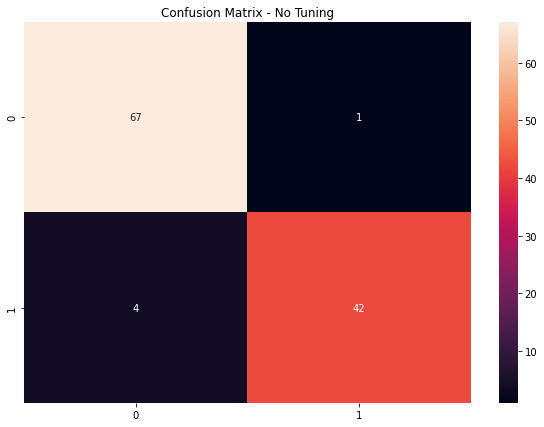

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix - No Tuning')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.heatmap(df_cm, annot=True,ax=ax)

#Tune via RandomizedSearchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'objective': ['binary'],
              'metric': ['auc'],
              'boosting': ['gbdt'],
              'num_leaves': [5, 10, 15, 20],
              'feature_fraction': [0.20, 0.5, 0.70],
              'bagging_fraction': [0.15, 0.33, 0.5, 0.66, 0.75],
              'bagging_freq': [10, 20, 40, 80],
              'learning_rate': [0.001, 0.005, 0.01, 0.025, 0.05],
              'verbose': [-1]
             }

lgb_estimator = lgb.LGBMClassifier()
random_search = RandomizedSearchCV(lgb_estimator, random_grid, n_iter=25, cv=5)
%time random_search.fit(X_train,y_train)

CPU times: user 10.1 s, sys: 338 ms, total: 10.4 s
Wall time: 5.76 s


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=25,
                   param_distributions={'bagging_fraction': [0.15, 0.33, 0.5,
                                                             0.66, 0.75],
                                        'bagging_freq': [10, 20, 40, 80],
                                        'boosting': ['gbdt'],
                                        'feature_fraction': [0.2, 0.5, 0.7],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.025, 0.05],
                                        'metric': ['auc'],
                                        'num_leaves': [5, 10, 15, 20],
                                        'objective': ['binary'],
                                        'verbose': [-1]})

In [64]:
random_search.best_params_

{'bagging_fraction': 0.5,
 'bagging_freq': 10,
 'boosting': 'gbdt',
 'feature_fraction': 0.5,
 'learning_rate': 0.05,
 'metric': 'auc',
 'num_leaves': 5,
 'objective': 'binary',
 'verbose': -1}

In [ ]:
model_lgbm = lgb.train(random_search.best_params_,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

y_test_pred = model_lgbm.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5 , 1, 0)

In [66]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_test_pred)))

AUC: 0.9492


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.98      0.91      0.94        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



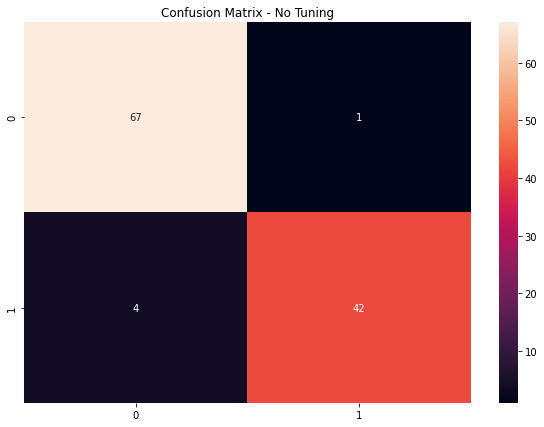

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix - No Tuning')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.heatmap(df_cm, annot=True,ax=ax)

#Tune via GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

search_grid = {'objective': ['binary'],
              'metric': ['auc'],
              'boosting': ['gbdt'],
              'num_leaves': [5, 10, 15, 20],
              'feature_fraction': [0.20, 0.5, 0.70],
              'bagging_fraction': [0.15, 0.33, 0.5, 0.66, 0.75],
              'bagging_freq': [10, 20, 40, 80],
              'learning_rate': [0.001, 0.005, 0.01, 0.025, 0.05, 0.10],
              'verbose': [-1]
             }

lgb_estimator = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgb_estimator, search_grid, cv=5)
%time grid_search.fit(X_train,y_train)

CPU times: user 8min 3s, sys: 15.5 s, total: 8min 18s
Wall time: 4min 32s


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'bagging_fraction': [0.15, 0.33, 0.5, 0.66, 0.75],
                         'bagging_freq': [10, 20, 40, 80], 'boosting': ['gbdt'],
                         'feature_fraction': [0.2, 0.5, 0.7],
                         'learning_rate': [0.001, 0.005, 0.01, 0.025, 0.05,
                                           0.1],
                         'metric': ['auc'], 'num_leaves': [5, 10, 15, 20],
                         'objective': ['binary'], 'verbose': [-1]})

In [73]:
grid_search.best_params_

{'bagging_fraction': 0.66,
 'bagging_freq': 40,
 'boosting': 'gbdt',
 'feature_fraction': 0.2,
 'learning_rate': 0.1,
 'metric': 'auc',
 'num_leaves': 5,
 'objective': 'binary',
 'verbose': -1}

In [ ]:
model_lgbm = lgb.train(grid_search.best_params_,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

y_test_pred = model_lgbm.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5 , 1, 0)

In [75]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_test_pred)))

AUC: 0.9600


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



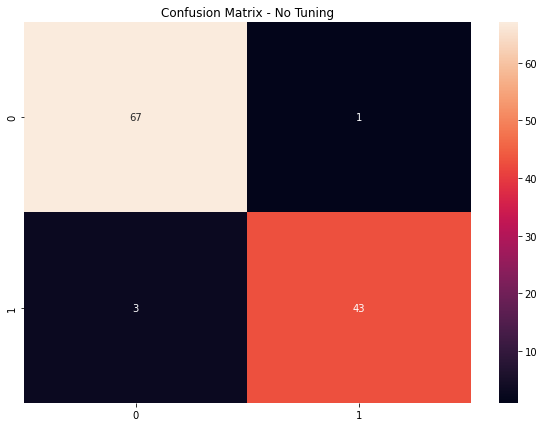

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix - No Tuning')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.heatmap(df_cm, annot=True,ax=ax)

#Tune via Bayesian Optimization




In [92]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [113]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

space =      {'num_leaves': hp.quniform('num_leaves', 5, 50, 5),
              'feature_fraction': hp.quniform('feature_fraction', 0.3, 1.0, 0.10),
              'bagging_fraction': hp.quniform('bagging_fraction', 0.3, 1.0, 0.10),
              'bagging_freq': hp.quniform('bagging_freq', 5, 25, 5),
              'learning_rate': hp.loguniform('learning_rate', 0.001, 1.0),
             }

def objective(space):
  train_data = lgb.Dataset(X_train, label=y_train)
  test_data = lgb.Dataset(X_test, label=y_test)

  parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              'num_leaves': int(space['num_leaves']),
              'feature_fraction': space['feature_fraction'],
              'bagging_fraction': space['bagging_fraction'],
              'bagging_freq': int(space['bagging_freq']),
              'learning_rate': space['learning_rate']
             }

  lgb_cv_results = lgb.cv(params=parameters, train_set=train_data, nfold=5, early_stopping_rounds=50, verbose_eval=False, stratified=False, seed=42)

  return {'loss': -lgb_cv_results['auc-mean'][-1], 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)

100%|██████████| 80/80 [00:18<00:00,  4.44it/s, best loss: -0.9909746736036663]


In [114]:
best

{'bagging_fraction': 0.9,
 'bagging_freq': 20.0,
 'feature_fraction': 1.0,
 'learning_rate': 1.2680008865522556,
 'num_leaves': 20.0}

In [116]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              'num_leaves': int(best['num_leaves']),
              'feature_fraction': best['feature_fraction'],
              'bagging_fraction': best['bagging_fraction'],
              'bagging_freq': int(best['bagging_freq']),
              'learning_rate': best['learning_rate']
             }

model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50, verbose_eval=False, )

y_test_pred = model_lgbm.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5 , 1, 0)

In [117]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_test_pred)))

AUC: 0.9453


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.93      0.93      0.93        46

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



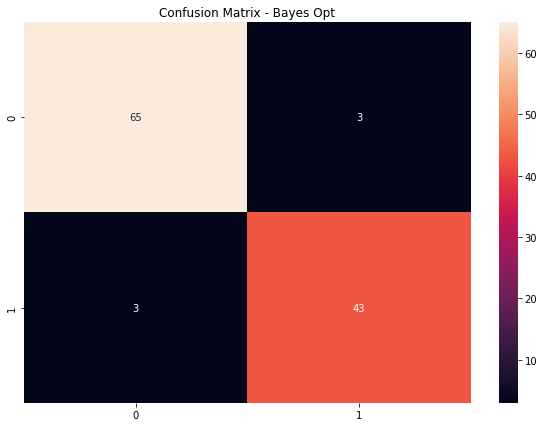

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix - Bayes Opt')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.heatmap(df_cm, annot=True,ax=ax)

#Tune via Optuna


In [122]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 4.9 MB/s 
     |████████████████████████████████| 81 kB 4.8 MB/s 
     |████████████████████████████████| 210 kB 10.7 MB/s 
     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 113 kB 34.8 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 150 kB 40.3 MB/s 


In [ ]:
import optuna

def objective(trial):
  train_data = lgb.Dataset(X_train, label=y_train)
  test_data = lgb.Dataset(X_test, label=y_test)

  parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              'num_leaves': trial.suggest_int('num_leaves', 2, 256),
              'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
              'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
              'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
              'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
              'learning_rate': trial.suggest_loguniform("eta", 1e-2, 1.0)
             }

  lgb_cv_results = lgb.cv(params=parameters, train_set=train_data, nfold=5, early_stopping_rounds=50, verbose_eval=False, stratified=False, seed=42)


  best_score = -lgb_cv_results["auc-mean"][-1]
  return best_score

study = optuna.create_study(direction="minimize", study_name='LightGBM')
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [124]:
trial.params

{'bagging_fraction': 0.539712953548638,
 'bagging_freq': 6,
 'eta': 0.18129297715063952,
 'feature_fraction': 0.47817009192085685,
 'min_child_samples': 8,
 'num_leaves': 256}

In [125]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              'num_leaves': trial.params['num_leaves'],
              'feature_fraction': trial.params['feature_fraction'],
              'bagging_fraction': trial.params['bagging_fraction'],
              'bagging_freq': trial.params['bagging_freq'],
              'min_child_samples': trial.params['min_child_samples'],
              'learning_rate': trial.params['eta']
             }

model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50, verbose_eval=False, )

y_test_pred = model_lgbm.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5 , 1, 0)

In [126]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_test_pred)))

AUC: 0.9383


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.98      0.89      0.93        46

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



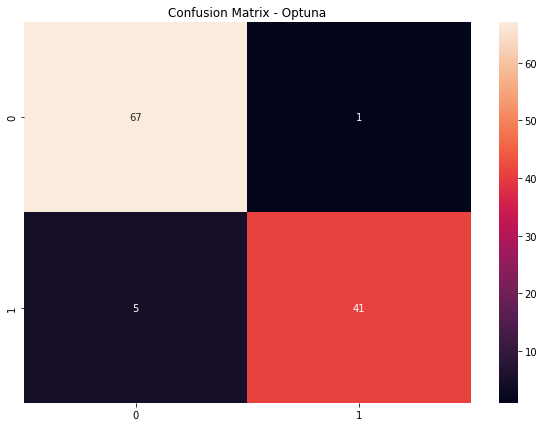

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix - Optuna')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.heatmap(df_cm, annot=True,ax=ax)